# An Analysis of the numpy.random Python Package (v 1.19)

***

NumPy is a Python package which enables the creation, manipulation and analysis of multi-dimensional arrays. As such, it is a key package for performing scientific computing within python [1].

A subset of the numpy package is numpy.random, which is used for the generation of pseudorandom number arrays based on defined parameters, and in some cases the stated probability distribution [2]. If the size of the array generated is sufficiently large, the plot of the array should mimic the distribution of the probability distribution used to generate the array. When a distribution is not specified, simple random data is generated.

When generating a random array, it is impossible for a computer program to generate completely random output. As such, a pseudorandom number generator is required in order to generate the pseudorandom numbers. This algorithm can be defined, with a default setting in the latest version of numpy.random of PCG64. Within this generator, a seed value, relating to a starting point for the algorithm, can be defined in order to ensure the array remains identical for each execution of the code. If the default seed is used, the generated numbers will be truly unpredictable, with varying results for each execution [3].

***


In [1]:
# importing the package for analysis
import numpy as np
# creating a variable with the default seed generator for ease of reference
rng = np.random.default_rng()
# importing a number of python packages which may help analyse the numpy output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<br>

## Simple Random Data

*integers, random, choice and bytes*


***


#### Integers

Integers allows for 5 different parameters; 
- *high:* the upper bound on the sampling pool 
- *low:* the lower bound on the sampling pool
- *dtype:* the dtype of the data. This is limited to float64 and float32, and impacts the level of accuracy to which floating numbers are stored in python. As the output here is integer values, this parameter will only have an effect if the upper bounds include values in excess of e08
- *size:* the number of values included in the output array 
- *endpoint:* boolean value to define whether the high value is included or excluded from the sampling pool. This is set to False by default. 

The output is an array of the defined size, filled with random integer values between the low and high values (including the low, excluding the high from the sample options). If undefined, the low has a default value of 0.

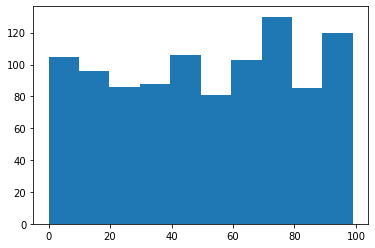

In [2]:
# x1 will be an array with 1000 elements between 0 and 99 inclusive
x1 = rng.integers(100, size=1000)
plt.hist(x1)
plt.show()

The above plot shows that the upper bound value of 100 is not included in the range of values included.

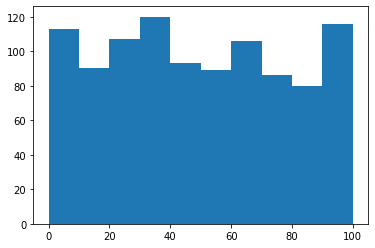

In [3]:
# testing the impact of the endpoint parameter
y1 = rng.integers(100, size=1000, endpoint=True)
plt.hist(y1)
plt.show()

As evidenced within the above plot, by changing endpoint from the default of False to True, the high value is now included in the range of integers to be randomly sampled.

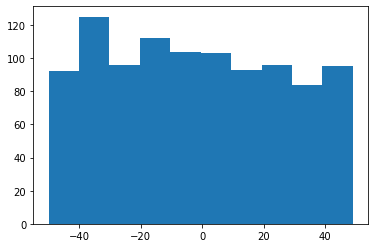

In [4]:
# investigating whether negative values can be included by specifying the low value
z1 = rng.integers(low=-50, high=50, size=1000)
plt.hist(z1)
plt.show()

When the low value is not specified, it is assumed as 0, but it will allow a user input to allow for negative integers, or increase the lower bound as required

***

<br>

#### Random

Random takes in up to 3 parameters:
 - *size:* The number of values included in the output
 - *dtype:* as defined for integers above, however given the decimal va;ues returned for random, this parameter may have a more discernible affect
 - *out:* allows the output to be assigned to another variable, provided it follows the same dimensions and size as the size parameter if it has been defined

If no parameters are passed into rng.random(), a single value between 0 and 1 is returned.

In [5]:
# when no parameters are passed, a random number between 0 and 1 is returned
w2 = rng.random()
w2

0.4700496369739011

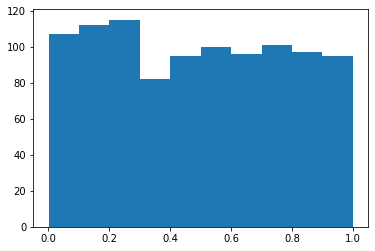

In [6]:
# a single parameter produces an array of that size
x2 = rng.random(1000)
plt.hist(x2)
plt.show()

when a single parameter is entered, numpy assumes it is a size parameter, resulting in the above graph with 1000 random numbers between 0 and 1

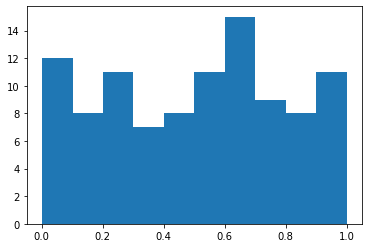

In [7]:
test=np.zeros(100)
p2 = rng.random(out=test)
plt.hist(p2)
plt.show()

By creating an array of 100 zero values, I can obtain an output of 100 values without defining the size parameter. As seen in the identical plots above and below, these outputs are saved both in the test array and the p2 variable to which it has been directly assigned.

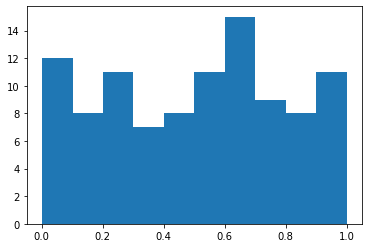

In [8]:
plt.hist(test)
plt.show()

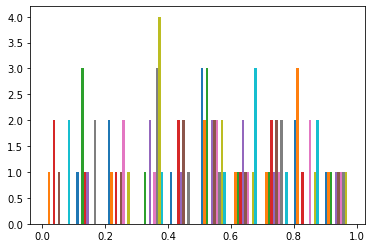

In [9]:
# can specify output type instead of size, to get arrays of a set size, rather than 1 array
y2 = rng.random((10,10))
plt.hist(y2)
plt.show()

The output is 10 arrays of size 10; numpy has used 10 colours to represent the values in each of the 10 arrays

***

<br>

#### Choice

choice accepts 6 parameters; a, size, replace, p, axis and shuffle.

- _a:_ this can be either an array, or a single positive integer, which provides the pool from which the random sample is generated. If a is a single figure, the selection range will be all the integers from 0 to a (excluding a). This array does not have to be numeric.

- _size:_ defines the size of the output. If the replace parameter is set to _False_, then size must be less than or equal to the size of _a_

- _replace:_ defines whether, once a value has been randomly selected, if it can be selected again. By default, this value is set to True. If set to False, each value can be selected at most once.

- _p:_ this parameter allows the user to define varying probabilities for selection to the values in the selection pool; thus, if defined, it must be equal in size to a. By default, the probability of selecting any number is equal.

- _axis:_ for multidimensional input arrays, the axis parameter defines the position in these arrays from which to sample. if a 1D array, or single integer value, is defined for a, then a change to this parameter should have no impact on the random selection.

- _shuffle:_ intuitively, this parameter defines whether the input data is shuffled between selections. This is only applicable when replace is set to False. By setting this parameter to False, the function will execute at a quicker rate, which may be beneficial for large input sizes.

The most complex function within the simple random data section of numpy.random, choice mirrors permutations and combinations [4], depending on the value assigned to the 'replace' parameter.

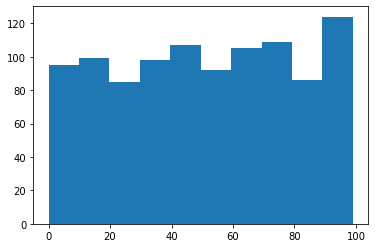

In [10]:
x3 = rng.choice(100,size=1000,replace=True)
# attempting to run this with replace=False will cause an error
# as the number of selections to be made exceeds the numbers to be chosen from.
plt.hist(x3)
plt.show()

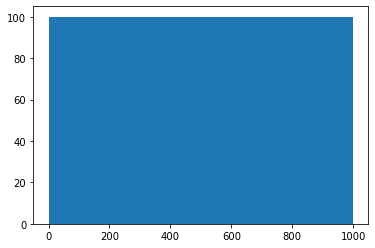

In [11]:
# having the size parameter equal to the number of possible choices with no replacement
y3 = rng.choice(1000,size=1000,replace=False)
plt.hist(y3)
plt.show()

Without replacement, when the selection pool and sample size are equal, each value is returned exactly once. While this appears redundant when plotted on a histogram, the order of the output array would prove useful if, for example, you wished to randomly assign a unique number to 1000 individuals in order to maintain anonymity.

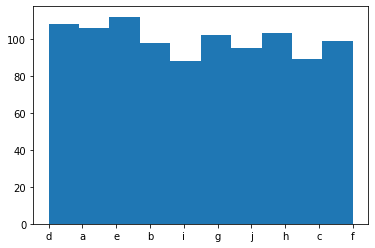

In [12]:
# useful when the selection variable are not numberic
z3 = rng.choice(['a','b','c','d','e','f','g','h','i','j'],size=1000)
plt.hist(z3)
plt.show()

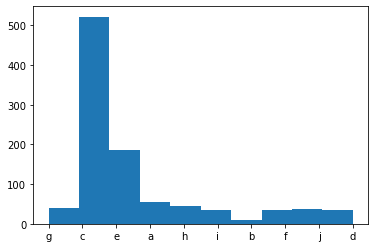

In [13]:
w3 = rng.choice(['a','b','c','d','e','f','g','h','i','j'],size=1000,p=[0.05,0.01,0.5,0.04,0.2,0.04,0.04,0.04,0.04,0.04])
plt.hist(w3)
plt.show()

As shown by the histograms of z3 and w3 above, assigning a probability weighting to the selection array has a significant influence on the selection. z3, where the values have been assigned equal probabilities of selection, appears to be graduating towards a uniform distribution, as expected. w3, by comparison, has a very high frequency of c, as expected by the 0.5 probability assigned to that value.

***

<br>

#### Bytes

Bytes takes only 1 input parameter; length. This defines the size of the output.

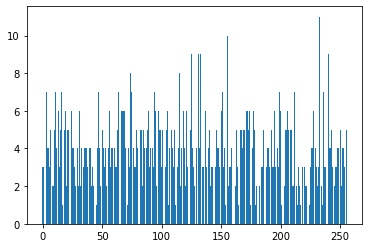

In [14]:
x4 = rng.bytes(1000)
#because the data is not numeric, cannot be plotted as a histogram
#instead I will use a barchart, to allow for a measure of comparison with the previous histograms
height = []
for i in x4:
    if i not in height:
        height.append(i)
count = np.zeros(len(height))
for j in x4:
    for k in range(len(height)):
        if j == height[k-1]:
            count[k-1] += 1

plt.bar(height,count)
plt.show()

***

<br>

## Permutations

*shuffle and permutation*

The shuffle and permutation functions have a lot in common; both have the same 2 input parameters - an ndarray to be rearranged, and an optional axis parameter - and at first glance, appear to produce the same format. In practice, there are two key differences between shuffle and permutation [5]:

 - permutation creates a rearranged _copy_ of the input array, whereas shuffle directly rearranges the input array. This property isn't evident when the input array is directly input within the function. However, if a predefined array x is used for the input, running the permutation function with input x has no effect on the variable x in itself; inputting x to the shuffle function will overwrite the variable with the shuffled array. Thus, if the original input needs to be maintained, the permutation function should be used.
 
 - if an integer value is used as the input for the function, shuffle will return an error, while permutation will rearrange a 1D-array of integer values from zero up to the the value below the input number

In [15]:
# defining 2 identical arrays, to compare how they are treated by both the permutation and shuffle functions
a1 = np.arange(10)
a2 = np.arange(10)

In [16]:
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
a2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The above outputs show that, before using the arrays as inputs to a function, they are identical. 

In [18]:
a1_perm = rng.permutation(a1)

In [19]:
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
a1_perm

array([3, 7, 9, 0, 6, 8, 5, 1, 4, 2])

After using a1 as the input to the permutation function, it remains as it was initially deinfed, and the new variable is assigned the rearranged copy produced by the permutation function

In [21]:
a2_shuf = rng.shuffle(a2)

In [22]:
a2

array([0, 1, 4, 6, 7, 8, 2, 9, 3, 5])

In [23]:
a2_shuf

In contrast, the valueas within the a2 array have been reordered following their use within the shuffle function, and as there is no new output from the shuffle function, the variable a2_shuf has no value.

In [24]:
rng.permutation(10)
# this will return an error if shuffle is used instead of permutation

array([2, 1, 9, 5, 4, 7, 0, 8, 6, 3])

In [25]:
a3 = [[0,1,2],[3,4,5],[6,7,8]]
rng.permutation(a3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [26]:
rng.permutation(a3,axis=1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

When a 2D array is used as the input, the definition of the axis parameter affects how the data is rearranged. The default value of axis=0 will permutate the order of the subarrays without rearranging the values within each subarray. By contrast, when axis is set to 1, the order of the sub arrays remain unchanged, while the values within each subarray are rearranged.

From multiple runs of the above cell, it is clear that the same rearrangement is performed for all subarrays of the input; that is, if the shuffle swaps the positions of the first 2 values in the first sub array, this same shuffle is performed on both the second and third subarray.

***

<br>

## Distributions

*binomial, exponential, normal, poisson and uniform*

A probability distribution is a mathematical function which gives the probability of an outcome in a given experiment [6]. The shape of a probability distribution varies depending on the event under investigation.

A probability distribution can be either discrete or continuous. A discrete distribution has a finite set of outcomes; often integers, though not always. A continuous distribution has an infinite number of outcomes; probabilities are calculated across a range of values, as the probability of getting a specific value in a continuous distribution is always zero.

***

<br>

#### Binomial Distribution

The binomial distribution relates to an event with teo possible outcomes; success or failure. A common example of an event which follows a binomial distribution is the tossing of a coin.

The parameters which can be input to the binomial function are as follows:

 - _n_: this is the number of times the event is repeated for each occurence. If n=10, then each iteration of the binomial function involves flipping a coin 10 times.
 - _p_: this is the probability of a success. As there are only 2 outcomes, the probability of failure is then (1-p). p=0.5 when tossing a coin, regardless of whether heads or tails is considered a success.
 - _size:_ this is an optional parameter which defines how many iterations of the binomial function will run. If this is not defined, the function will return a single value.
 
The output of the binomial function will be a single integer value (or an array of integer values). In the context of tossing a coin, this integer corresponds to the number of, say, heads obtained when the coin was tossed n times.

Intuitively, I would expect that a low probability would result in a higher number of low outcomes, while conversely if the probability is high then the results would be skewed towards the upper values in the range of outcomes.

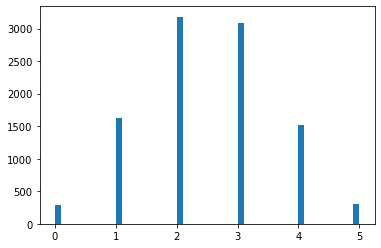

In [27]:
# visualising the distribution with equal probabilities of success failure
b_dist1 = rng.binomial(5,0.5,size=10000)
# switching from matplotlib to seaborn for the probability distributions
# produces a better visual of the results in these scenarios [7]
sns.distplot(b_dist1,kde=False,hist_kws={"linewidth": 15,'alpha':1})

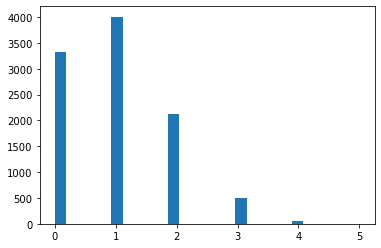

In [28]:
# investigating the impact of a lower probability of success
b_dist2 = rng.binomial(5,0.2,size=10000)
sns.distplot(b_dist2,kde=False,hist_kws={"linewidth": 15,'alpha':1})

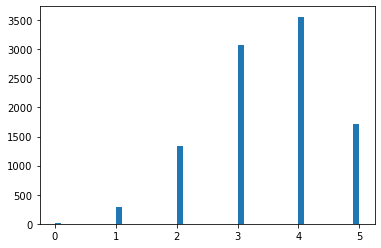

In [29]:
# testing a higher probability for comparison
b_dist3 = rng.binomial(5,0.7,size=10000)
sns.distplot(b_dist3,kde=False,hist_kws={"linewidth": 15,'alpha':1})

The shapes of the above 3 plots align with my expectations; when the probability is 0.5 the results are centred, whereas when the probability of success is lower and higher than the probability of failure the plot is skewed right and left respectively.

***

<br>

#### Exponential Distribution

The exponential probability distribution describes the probability that an event will occur within a given time frame. The distribution depends on the average rate, or length of time for the event. The average rate and average length of time are the inverse of one another, and either can be defined when the exponential distribution is in use, so it is important to ensure that the correct figure is used in the numpy random exponential function. 

Within numpy, it is the average length of time which is taken as the input to the scale parameter, so if it is the rate that is given, this figure must be inverted before it is used in the function.

For example, if the average service rate at a customer service desk is 0.25 people per minute, this corresponds to an average of 4 minutes for each person served. In this situation, the scale parameter would be set to 4 [8].

For size=1, a random value is returned that corresponds to the length of time waiting for an event to occur. For large n, I would expect the plot to be at its highest point somewhere in the area just the average time used in the input, with the frequency decreasing in both directions. The reason this would fall *before* the average time, and not around the average, is because we do not know how much time has already elapsed before we start the countdown; in the customer service example, the average time is 4 minutes, but when I join the queue behind the person being served, I do not know how much time has already been spent assisting them.

As time is continuous, this is a continuous distribution, as such I would not expect to get any 2 outputs which are the same.

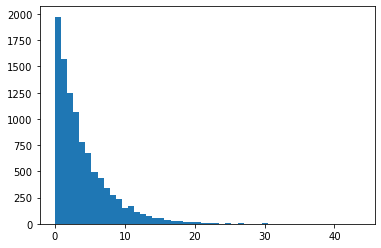

In [30]:
e_dist1 = rng.exponential(4,size=10000)
sns.distplot(e_dist1,kde=False,hist_kws={"linewidth": 5,'alpha':1})

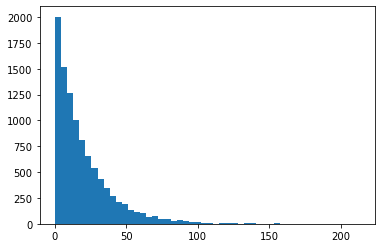

In [31]:
e_dist2 = rng.exponential(20,size=10000)
sns.distplot(e_dist2,kde=False,hist_kws={"linewidth": 5,'alpha':1})

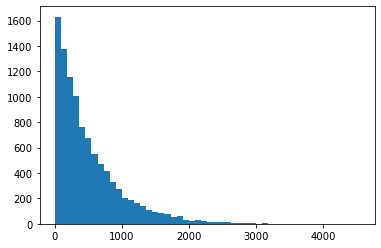

In [32]:
e_dist3 = rng.exponential(500,size=10000)
sns.distplot(e_dist3,kde=False,hist_kws={"linewidth": 5,'alpha':1})

The above 3 plots show that the exponential distribution has a distinct shape, regardless of the scale used in the input; however the scale value does have a significant impact on the range of values across the x-axis. As you would expect, as the timeframe increases past the average time length used as the scale input, the number of outcomes significantly decreases.

***

<br>

#### The Normal Distribution

The normal probability distribution is the most common probability distribution, well-known for its 'bell-curve' shape. This distribution is often used in real life scenarios, where the exact distribution is not known. 

There are 2 parameters, aside from the size parameter, which need to be defined for this distribution; the loc parameter corresponds to the mean of the population, the scale corresponds to the standard deviation. [9]

For the output of this function, I expect a symmetrical curve with its highest point falling over the loc parameter used as the input. Further, based on the empirical rule [10], almost all of the results should fit within +/- 3 times the scale value on either side of the loc.

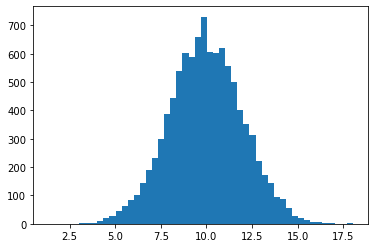

In [33]:
n_dist1 = rng.normal(loc=10,scale=2,size=10000)
sns.distplot(n_dist1,kde=False,hist_kws={"linewidth": 5,'alpha':1})

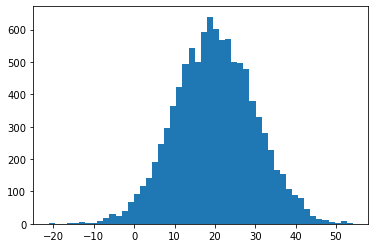

In [34]:
n_dist2 = rng.normal(loc=20,scale=10,size=10000)
sns.distplot(n_dist2,kde=False,hist_kws={"linewidth": 5,'alpha':1})

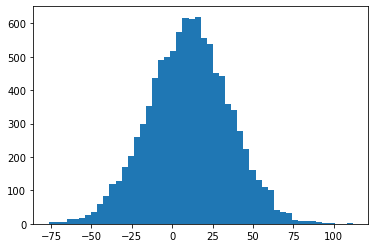

In [35]:
n_dist3 = rng.normal(loc=10,scale=25,size=10000)
sns.distplot(n_dist3,kde=False,hist_kws={"linewidth": 5,'alpha':1})

For n_dist1, with loc = 10 and scale = 2, the range of values within +/- 3 times the scale is [4,16] and the plot clearly shows that this range does contain almost all the results from the output. This trend is repeated across the remaining 2 examples.

While the curves appear to have the same or similar spread and steepness of curve, when the with of each bin is taken into account, and that effect on the height of the bin, the curves would in fact have very different appearances. The relatively low scale in n_dist1 causes a high frequency around the loc, with a sharp decline in frequency as you move away from this central value; in comparison, n_dist3 with its much larger scale would have a relatively lower peak, and a more gradual decline in frequency as you move away from the loc.

***

<br>

#### The Poisson Distribution

The poisson distribution describes hte number of events likely to occur within a given time frame [11]. It takes lamba as an input parameter, which describes the average frequency of events within the same time frame. The output of the poisson function will be an integer value corresponding to a number of events which are likely to occur in the given timeframe. As such, it is a discrete probability distribution.

The poisson distribution is often confused with the exponential distribution; while the events described by these distributions can be very similar, there are key differences which distinguish the two distributions. For example, if one is interested in shope footfall and turnover, a poisson distribution would describe the number of customers attending the shop on a Saturday, whereas an exponential distribution would describe the length of time a customer is waiting to be served at the till.

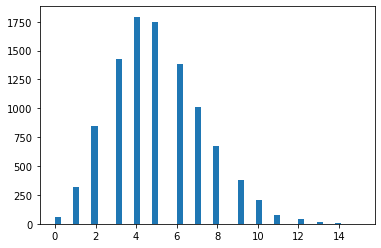

In [36]:
p_dist1 = rng.poisson(lam=5,size=10000)
sns.distplot(p_dist1,kde=False,hist_kws={"linewidth": 5,'alpha':1})

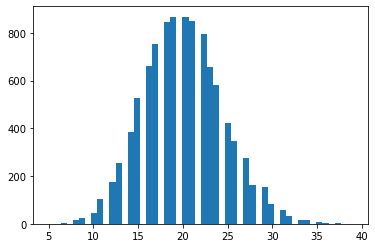

In [37]:
p_dist2 = rng.poisson(lam=20,size=10000)
sns.distplot(p_dist2,kde=False,hist_kws={"linewidth": 5,'alpha':1})

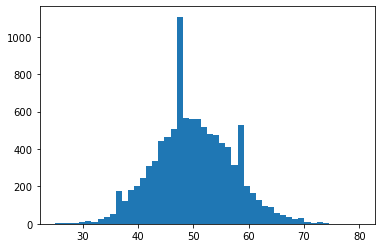

In [38]:
p_dist3 = rng.poisson(lam=50,size=10000)
sns.distplot(p_dist3,kde=False,hist_kws={"linewidth": 5,'alpha':1})

What's interesting about the above 3 graphs is that as the value used for lambda increases, the range of possible outcomes quickly grows as well; this is clearly evidenced by the increase in the number of bins shown on the histograms as lambda increases. As expected, the more bins required to graph the function, the lower the height of these bins.

The above graphs and the conclusions I have drawn from them would lead me to believe that the poisson distribution is more useful for timeframes with suitably small values for lambda.

***

<br>

#### The Uniform Distribution

On the surface, the uniform distribution function appears very similar to the integers function which falls within the simple random data section of numpy.random. It takes a low and high input value, wherein the low value is included and the high value is excluded. The key difference is that the integer function is discrete, whereas the uniform distribution is continuour; that is, decimal values as well as integer values are included within this distribution. 

As implied by its name, a uniform distribution is evenly spread across the range of values, so the output is expected to be largely evenly distributed across the range.

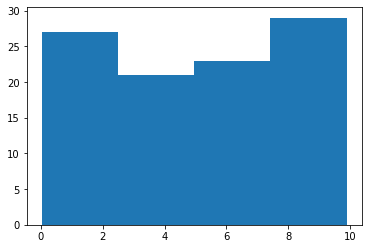

In [39]:
u_dist1 = rng.uniform(low=0,high=10,size=100)
sns.distplot(u_dist1,kde=False,hist_kws={"linewidth": 5,'alpha':1})

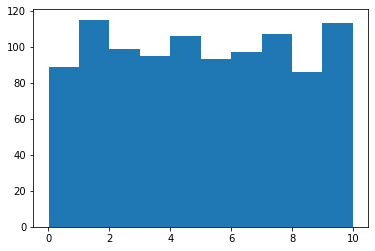

In [40]:
u_dist2 = rng.uniform(low=0,high=10,size=1000)
sns.distplot(u_dist2,kde=False,hist_kws={"linewidth": 5,'alpha':1})

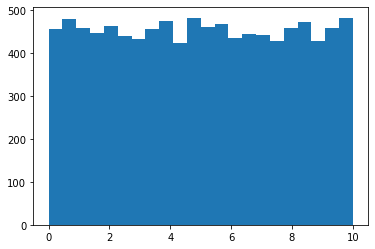

In [41]:
u_dist3 = rng.uniform(low=0,high=10,size=10000)
sns.distplot(u_dist3,kde=False,hist_kws={"linewidth": 5,'alpha':1})

While the first plot appears to vary quite significantly across the range of outputs, this appears to be due to size of the output specified. As the size of the output grows, the plot continues to approach a an even spread across the data range.

***

<br>

## Seeds

As was briefly touched on in the introduction, numbers generated by numpy.random are not truly random, instead relying on a Pseudorandom number generator (PRNG) to generate arrays which closely mimic random results. There are a variety of different algorithms available which can be used to generate pseudorandom output, with PCG64 the default option enabled in numpy.random v1.19.

A PRNG, at a high level, is a function which has either a defined or arbitrary starting point, known as the seed. While the exact function will vary depending on the algorithm implemented, it should be efficient and deterministic (if seed state is known). If the function is not efficient, this would counteract the advantage of using a computer to quickly generate large random value sequences, and being able to determine the output for a given seed value allows for problems to be reproduced. A PRNG algorithm is also periodic in nature, though the longer the period before repetition, the better the algorithm [12].

When no parameters are defined in default_rng(), pyhton relies on the execution time to decide the seed, or starting point, for the algorithm. Thus each execution of the code will provide different results.

<br>

#### Defined vs Default Seeds

Until now, I have been using the rng variable when running each function, which contains the value np.random.default_rng(). As there are no parameters passed into this, there is no predictability to the random numbers generated; for each restart of the kernel of the jupyter notebook, the results of the below 3 cells will vary.

In [42]:
rng.integers(100, size=10)

array([60, 89, 31, 56, 99, 14, 99, 82,  0, 51], dtype=int64)

In [43]:
rng.integers(100, size=10)

array([43, 70, 94, 95, 86, 15, 39, 74, 75,  7], dtype=int64)

In [44]:
rng.integers(100, size=10)

array([ 7, 89, 44, 55, 51, 62, 95, 52, 69, 57], dtype=int64)

As seen in the above 3 cells and the below image, the arrays generated provide different results each time the kernel is restarted, so unless the array generated is copied into another variable or location, the exact values generated are lost when the cell is rerun

> ![title](seed-undefined.png)

***

Alternatively, default_rng() can be fed a seed parameter, defining a fixed started point from where to beegin the pseudo random process of generating numbers. By defining this parameter, it will result in the same "random" numbers being generated regardless of how many times the kernel is restarted. This allows for the generation of random numbers, while at the same time the exact results are reproducible

In [45]:
rg = np.random.default_rng(seed=0)

In [46]:
rg.integers(100, size=10)

array([85, 63, 51, 26, 30,  4,  7,  1, 17, 81], dtype=int64)

In [47]:
rg.integers(100, size=10)

array([64, 91, 50, 60, 97, 72, 63, 54, 55, 93], dtype=int64)

In [48]:
rg.integers(100, size=10)

array([27, 81, 67,  0, 39, 85, 55,  3, 76, 72], dtype=int64)

In [49]:
rg.integers(100, size=10)

array([84, 17,  8, 86,  2, 54,  8, 29, 48, 42], dtype=int64)

You will find that, no matter how many times you rerun this notebook, the above results will mirror the below screenshot.

> ![title](seed-defined.png)

***

***

<br>

##### References
[1] Python NumPy; GeeksForGeeks; https://www.geeksforgeeks.org/python-numpy/

[2] Random sampling (numpy.random); NumPy; https://numpy.org/doc/stable/reference/random/index.html

[3] Random Generator; NumPy; https://numpy.org/doc/stable/reference/random/generator.html

[4] Combinations and Permutations; Maths Is Fun; https://www.mathsisfun.com/combinatorics/combinations-permutations.html

[5] Shuffle vs. Permute Numpy; ecatmur; https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

[6] Probability Distribution; Wikipedia; https://en.wikipedia.org/wiki/Probability_distribution

[7] Python and R Tips; cmdline; https://cmdlinetips.com/2018/03/probability-distributions-in-python/

[8] The Exponential Distribution; OpenStax; https://openstax.org/books/introductory-business-statistics/pages/5-3-the-exponential-distribution

[9] The Normal Distribution; Wikipedia; https://en.wikipedia.org/wiki/Normal_distribution

[10] 68-95-99.7 rule; Wikipedia; https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

[11] The Poisson Distribution; Wikipedia; https://en.wikipedia.org/wiki/Poisson_distribution

[12] Pseudo Random Number Generator (PRNG); Yash Singla; https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/?ref=lbp



***

# End

***